<H1> CURSO DE INTRODUÇÃO A MACHINE LEARNING <H2>
<h2> Preprocessamento de Imagens </h2>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from PIL import Image

In [3]:
import PIL

<h2> Carregar a imagem </h2>

In [4]:
img = Image.open("../images/fotoRonaldo.png")

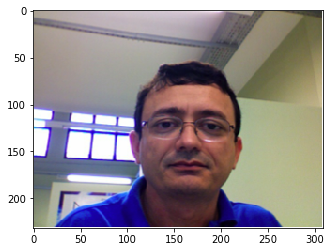

In [5]:
plt.imshow(img)

<h2> Aplicar filtros </h2>

TypeError: Invalid dimensions for image data

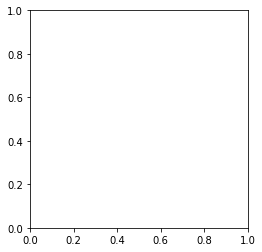

In [6]:
img = img.convert('LA')
plt.imshow(img)

In [ ]:
from skimage import data
from skimage import io
image = io.imread('../images/fotoRonaldo.png')
plt.imshow(image);

In [ ]:
# usando o skimage
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

In [ ]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

In [ ]:
image_show(image)

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.hist(image.ravel(), bins=32, range=[0, 256])
ax.set_xlim(0, 256);

In [ ]:
image_gray = color.rgb2gray(image) 
image_show(image_gray);

In [ ]:
def circle_points(resolution, center, radius):
    """
    Gera os pontos de um circulo
    """   
    radians = np.linspace(0, 2*np.pi, resolution)
    c = center[1] + radius*np.cos(radians)#polar co-ordinates
    r = center[0] + radius*np.sin(radians)
    
    
    return np.array([c, r]).T

In [ ]:
points = circle_points(600, [130, 160], 80)[:-1]

In [ ]:
points

In [ ]:
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)

In [ ]:
snake = seg.active_contour(image_gray, points)
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

In [ ]:
snake

In [ ]:
image

<h2> Um pouco de Áudio </h2>

In [ ]:
from scipy.io import wavfile

In [ ]:
samplerate, data = wavfile.read("../images/gritogol.wav")

In [ ]:
samplerate

In [ ]:
data

In [ ]:
samples = data.shape[0]
samples

In [ ]:
plt.plot(data[5000:6000])

In [ ]:
from scipy.fftpack import fft,fftfreq

In [ ]:
datafft = fft(data)
#pega os valores dos componentes real e complexo
fftabs = abs(datafft)

In [ ]:
freqs = fftfreq(samples,1/samplerate)

In [ ]:
plt.plot(freqs,fftabs)

In [ ]:
plt.xlim( [10, samplerate/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])

<h2> Python faz tudo ;-)) </h2>